# Dimensionality Reduction Using Auto Encoders
This notebook implements the auto encoders to reduce the dimesionality of image from (28 by 28) to (5 by 5), which means that it converts 784 features to 25.

## 1. Problem Definition:
We have to analyse and see that how auto encoder actract features, reduce size and reconstruct the same features(Image) using encoded features. 
  
## 2. Data:
Orignal Dataset came keras mnist data set but we can use any of our own too.
  
## 3. Getting Toolkit Ready:  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Reshape
from keras.optimizers import SGD
from keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing import image

Using TensorFlow backend.


## 4. Getting Data Ready:

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
X_train.ndim

3

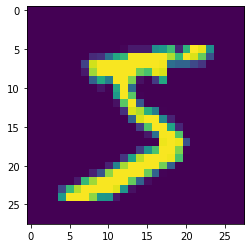

In [4]:
plt.imshow(X_train[0]); 

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
28*28

784

You can see that we are really too much features . Literly (28 by 28) means `784` features. So lets convert them into 25 and see how autoencoder preserve our all the features.

In [7]:
## Scaling the features
X_train=X_train/255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test=X_test/255

## 5. Building Auto Encoder:

In [10]:
## Building Encoder
encoder=Sequential([
    Flatten(input_shape=[28,28]),
    Dense(units=400,activation="relu"),
    Dense(units=200,activation="relu"),
    Dense(units=100,activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=25,activation="relu")
])

#Decoder
decoder=Sequential([
    Dense(units=50,input_shape=[25],activation="relu"),
    Dense(units=100,activation="relu"),
    Dense(units=200,activation="relu"),
    Dense(units=400,activation="relu"),
    Dense(units=784,activation="sigmoid"),
    Reshape([28,28])
])

#combining the both
model=Sequential([encoder,decoder])
## Compiling the model
model.compile(optimizer=SGD(learning_rate=1.15),
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [11]:
model.fit(X_train,
          X_train,
          epochs=10,
         validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.2524 - accuracy: 0.7905 - val_loss: 0.2163 - val_accuracy: 0.7920
Epoch 2/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.1912 - accuracy: 0.7963 - val_loss: 0.1772 - val_accuracy: 0.7983
Epoch 3/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.1653 - accuracy: 0.8011 - val_loss: 0.1577 - val_accuracy: 0.8024
Epoch 4/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.1550 - accuracy: 0.8028 - val_loss: 0.1465 - val_accuracy: 0.8042
Epoch 5/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.1466 - accuracy: 0.8044 - val_loss: 0.1419 - val_accuracy: 0.8025
Epoch 6/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.1401 - accuracy: 0.8058 - val_loss: 0.1345 - val_accuracy: 0.8044
Epoch 7/10
60000/60000 [==============================] 

### Checking Orignal and Reconstructed Images:

In [13]:
recons_img=model.predict(X_test[:10])

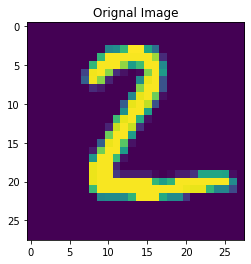

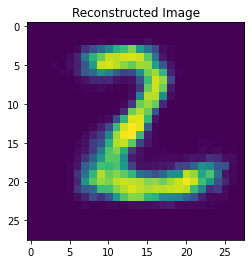

In [14]:
n=1
plt.title('Orignal Image');
plt.imshow(X_test[n])
plt.show()
plt.title("Reconstructed Image");
plt.imshow(recons_img[n])

#### We can fit such model on our custom data set and improve it too.
#### Thank YOU